# Stock Picking

Docs:


In [ ]:
!pip3 install -qU numpy
!pip3 install -qU pandas
!pip3 install -qU jinja2
!pip3 install -qU tqdm
!pip3 install -qU statsmodels
!pip3 install -qU requests
!pip3 install -qU beautifulsoup4
!pip3 install -qU matplotlib
!pip3 install -qU yfinance

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.3 which is incompatible.
pyportfolioopt 1.5.5 requires numpy<2.0.0,>=1.22.4, but you have numpy 2.1.3 which is incompatible.


More APIs to consider:
- https://site.financialmodelingprep.com/developer/docs/blog

In [4]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

## World MSCI

In [ ]:
from folib.market import get_msci_world_tickers
print(get_msci_world_tickers())

['NVDA', 'AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL', 'GOOG', 'AVGO', 'TSLA', 'LLY', 'JPM', 'BRKB', 'UNH', 'XOM', 'V', 'MA', 'PG', 'HD', 'COST', 'JNJ', 'NOVO-B.CO', 'WMT', 'ABBV', 'NFLX', 'BAC', 'CRM', 'ORCL', 'ASML.AS', 'CVX', 'KO', 'MRK', 'NESN.SW', 'SAP.DE', 'AMD', 'PEP', 'WFC', 'CSCO', 'ROG.SW', 'AZN.L', 'LIN', 'ACN', 'NOVN.SW', 'ADBE', 'MCD', 'SHEL.L', 'TMO', 'ABT', 'PM', 'NOW', 'IBM', 'CAT', 'GE', 'TXN', 'QCOM', 'MC.PA', 'ISRG', '7203.T', 'INTU', 'VZ', 'DIS', 'HSBA.L', 'CMCSA', 'RY.TO', 'AMGN', 'GS', 'DHR', 'BKNG', 'T', 'PFE', 'NEE', 'RTX', 'AXP', 'CBA.AX', 'SPGI', 'ULVR.L', 'AMAT', 'LOW', 'SIE.DE', 'BLK', 'MS', 'BHP.AX', 'UNP', 'SU.PA', 'PGR', 'UBER', 'TTE.PA', 'HON', 'ETN', 'TJX', 'SYK', 'COP', 'ALV.DE', 'BSX', 'FI', 'VRTX', 'SAN.PA', 'C', 'BX', 'LMT', '8306.T', 'TMUS', 'PANW', 'ADP', 'MDT', 'BA', '6501.T', 'BMY', 'SBUX', 'ADI', 'GILD', 'MU', '6758.T', 'MMC', 'CB', 'SCHW', 'DTE.DE', 'PLD', 'DE', 'ANET', 'UBSG.SW', 'AI.PA', 'INTC', 'AMT', 'LRCX', 'TD.TO', 'SO', 'SHOP.TO', 'UPS', 'EL

## S&P 500

In [ ]:
from folib.market import get_sp500_tickers
print(get_sp500_tickers())

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMTM', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK-B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', '

## NASDAQ 100

In [ ]:
from folib.market import get_nasdaq100_tickers
print(get_nasdaq100_tickers())

['ADBE', 'AMD', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ARM', 'ASML', 'AZN', 'TEAM', 'ADSK', 'ADP', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CHTR', 'CTAS', 'CSCO', 'CCEP', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'DASH', 'EA', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LIN', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MDB', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SBUX', 'SMCI', 'SNPS', 'TTWO', 'TMUS', 'TSLA', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBD', 'WDAY', 'XEL', 'ZS']


In [1]:
from folib.market import get_nasdaq100_tickers
from folib.screener import Screener

# set tickers to use
tickers = get_nasdaq100_tickers()
screener = Screener(tickers)
df = screener.to_dataframe()
df.head()

c:\Users\jlche\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 59%|█████▉    | 60/101 [00:09<00:06,  6.16it/s]


KeyError: 'quickRatio'

In [17]:
equities = screener.equities
equities[0].info.to_frame().T.columns

Index(['date', 'symbol', 'name', 'type', 'industry', 'sector', 'currency',
       'financial_currency', 'shares_outstanding', 'market_cap',
       'previous_close', 'beta', 'quick_ratio', 'debt_to_equity',
       'return_on_equity', 'revenue_cagr', 'gross_margin_avg', 'rsi',
       'trailing_pe', 'forward_pe'],
      dtype='object')

In [12]:
# set tickers to use
tickers=nasdaq100_tickers

# download stocks prices
t = yf.Tickers(tickers)
df = t.history(period='5y', interval='1d', auto_adjust=True) # group_by = 'ticker'
df.tail()

[*********************100%***********************]  101 of 101 completed

2 Failed downloads:
['ARM', 'GEHC']: YFInvalidPeriodError("%ticker%: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']")


Price                     Adj Close            Close                          \
Ticker                          ARM GEHC        AAPL        ABNB        ADBE   
Date                                                                           
2024-10-18 00:00:00+00:00       NaN  NaN  235.000000  136.449997  494.899994   
2024-10-21 00:00:00+00:00       NaN  NaN  236.479996  137.190002  497.709991   
2024-10-22 00:00:00+00:00       NaN  NaN  235.860001  135.589996  493.109985   
2024-10-23 00:00:00+00:00       NaN  NaN  230.759995  131.919998  485.029999   
2024-10-24 00:00:00+00:00       NaN  NaN  230.619995  132.970001  484.269989   

Price                                                                      \
Ticker                            ADI         ADP        ADSK         AEP   
Date                                                                        
2024-10-18 00:00:00+00:00  228.330002  292.290009  292.989990  100.690002   
2024-10-21 00:00:00+00:00  225.669998  290.910004  289.779999  100.160004   
2024-10-22 00:00:00+00:00  224.619995  291.339996  288.480011   99.889999   
2024-10-23 00:00:00+00:00  226.850006  290.040009  286.299988  100.830002   
2024-10-24 00:00:00+00:00  229.259995  290.065002  287.529999   99.949997   

Price                                  ...     Volume                    \
Ticker                           AMAT  ...       TSLA      TTD     TTWO   
Date                                   ...                                
2024-10-18 00:00:00+00:00  186.360001  ...   49611900  2627600   976800   
2024-10-21 00:00:00+00:00  184.460007  ...   47329000  1916400  1129100   
2024-10-22 00:00:00+00:00  183.000000  ...   43268700  2859200  1697000   
2024-10-23 00:00:00+00:00  182.699997  ...   77867400  2175400  1694800   
2024-10-24 00:00:00+00:00  184.160400  ...  134449686   480867   405616   

Price                                                                    \
Ticker                          TXN    VRSK     VRTX       WBD     WDAY   
Date                                                                      
2024-10-18 00:00:00+00:00   4029500  439200  2260100  16790700   955800   
2024-10-21 00:00:00+00:00   4948100  432700   689500  28057100   898400   
2024-10-22 00:00:00+00:00   7910800  378800  1132500  18291200  1647300   
2024-10-23 00:00:00+00:00  10544700  487700   991300  23257800  1875000   
2024-10-24 00:00:00+00:00   4242567  107516   233129   8797949   799132   

Price                                        
Ticker                         XEL       ZS  
Date                                         
2024-10-18 00:00:00+00:00  3651800  1131100  
2024-10-21 00:00:00+00:00  2178700  1562100  
2024-10-22 00:00:00+00:00  2243900   907800  
2024-10-23 00:00:00+00:00  2338200  1078000  
2024-10-24 00:00:00+00:00  1874156   582770  

[5 rows x 705 columns]

In [4]:
weather_df = pd.DataFrame(np.random.rand(10,2)*5,
                          index=pd.date_range(start="2021-01-01", periods=10),
                          columns=["Tokyo", "Beijing"])

def rain_condition(v):
    if v < 1.75:
        return "Dry"
    elif v < 2.75:
        return "Rain"
    return "Heavy Rain"

def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

weather_df.loc["2021-01-04":"2021-01-08"].style.pipe(make_pretty)

,Tokyo,Beijing
Monday,Dry,Heavy Rain
Tuesday,Heavy Rain,Heavy Rain
Wednesday,Heavy Rain,Dry
Thursday,Dry,Rain
Friday,Rain,Dry


## Single Ticker Playground

In [4]:
yt = yf.Ticker('BLK')
yt.info

{'address1': '50 Hudson Yards',
 'city': 'New York',
 'state': 'NY',
 'zip': '10001',
 'country': 'United States',
 'phone': '212 810 5300',
 'website': 'https://www.blackrock.com',
 'industry': 'Asset Management',
 'industryKey': 'asset-management',
 'industryDisp': 'Asset Management',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'BlackRock, Inc. is a publicly owned investment manager. The firm primarily provides its services to institutional, intermediary, and individual investors including corporate, public, union, and industry pension plans, insurance companies, third-party mutual funds, endowments, public institutions, governments, foundations, charities, sovereign wealth funds, corporations, official institutions, and banks. It also provides global risk management and advisory services. The firm manages separate client-focused equity, fixed income, and balanced portfolios. It also launches and ma

In [72]:
def financial_metric_growth(yahoo_ticker: yf.Ticker, statement: str = 'income_stmt', metric: str = 'Total Revenue'):
    # Get the annual income statement metric for the company
    annual= getattr(yahoo_ticker, statement).loc[metric].sort_index().dropna()  # Reverse the order to have the most recent year at the end
    annual = annual.astype(float).pct_change().dropna()

    # Get the quarterly income statement metric for the company
    quarterly = getattr(yahoo_ticker, f'quarterly_{statement}').loc[metric].sort_index().dropna()  # Reverse the order to have the most recent year at the end
    quarterly = quarterly.astype(float).pct_change(periods=4).dropna()
    
    # Depending whether last quarter ends with last year
    if annual.index[-1].timestamp() == quarterly.index[-1].timestamp():
        return annual.iloc[-1]
    else: # or not
        # print(annual.iloc[-1], quarterly.iloc[-1])
        return 0.5*annual.iloc[-1] + 0.5*quarterly.iloc[-1]

financial_metric_growth(yt)

0.25562401116216005

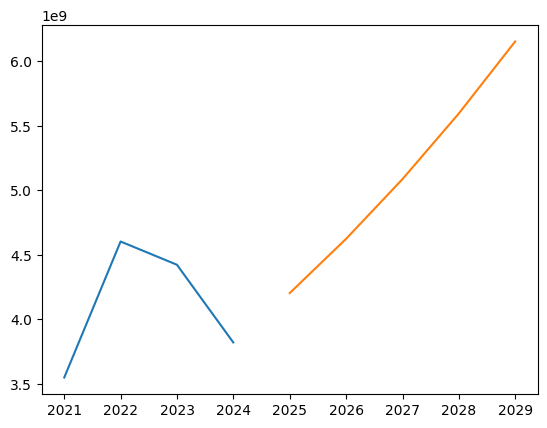

In [7]:
import matplotlib.pyplot as plt

def cagr_forecast(data: pd.Series, years_forecast: int = 5, rate: float = 0):
    """
    Forecast future values using the Compound Annual Growth Rate (CAGR) method.

    Args:
        data (pd.Series): Historical data with a DatetimeIndex.
        years_forecast (int, optional): Number of years to forecast. Defaults to 5.
        rate (float, optional): Annual growth rate. Defaults to 0.

    Returns:
        pd.Series: Forecasted values for the specified number of years.
    """
    # Calculate the forecasted values
    years = np.arange(1, years_forecast + 1)
    forecast_values = data.iloc[-1] * (1 + rate) ** years

    # Create a DatetimeIndex for the forecasted years
    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=years_forecast, freq='YE')

    # Create a Series with the forecasted values
    forecast_series = pd.Series(forecast_values, index=forecast_index)

    return forecast_series

s = yt.cash_flow.loc['Free Cash Flow'].sort_index().dropna()
lf = cagr_forecast(s, years_forecast=5, rate=0.1)

plt.plot(s.index, s.values, label='Historical Data')
plt.plot(lf.index, lf.values, label='Forecast')

In [81]:
s = yt.cash_flow.loc['Free Cash Flow'].sort_index().dropna()
forecast_index = pd.date_range(start=s.index[-1] + pd.DateOffset(years=1), periods=5, freq='YE')
forecast_index

DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

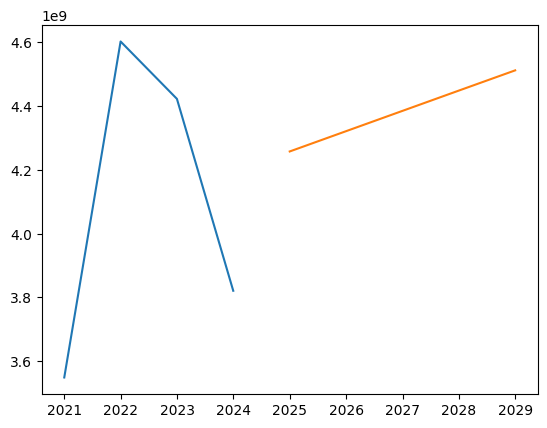

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def linear_forecast(data: pd.Series, years_forecast: int = 5):
    X = data.index.year.values.reshape(-1, 1)
    y = data.values
    model = LinearRegression().fit(X, y)
    years = range(data.index.year.max() + 1, data.index.year.max() + years_forecast + 1)
    forecast_X = np.array(years).reshape(-1, 1)
    forecast_y = model.predict(forecast_X)
    forecast_index = pd.date_range(start=s.index[-1] + pd.DateOffset(years=1), periods=5, freq='YE')
    return pd.Series(forecast_y, index=forecast_index)

s = yt.cash_flow.loc['Free Cash Flow'].sort_index().dropna()
lf = linear_forecast(s, years_forecast=5)

plt.plot(s.index, s.values, label='Historical Data')
plt.plot(lf.index, lf.values, label='Forecast')

In [9]:
yt.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,23575299.0,22318881.0,20390882.0,19542488.0,NaN
Ordinary Shares Number,148500074.0,149756492.0,151684491.0,152532885.0,NaN
Share Issued,172075373.0,172075373.0,172075373.0,172075373.0,NaN
Net Debt,NaN,NaN,NaN,NaN,126000000.0
Total Debt,9702000000.0,8489000000.0,9318000000.0,8019000000.0,NaN
...,...,...,...,...,...
Receivables,3916000000.0,3264000000.0,3789000000.0,3535000000.0,NaN
Accounts Receivable,3916000000.0,3264000000.0,3789000000.0,3535000000.0,NaN
Cash Cash Equivalents And Short Term Investments,10607000000.0,8747000000.0,9323000000.0,8664000000.0,NaN
Other Short Term Investments,1871000000.0,1331000000.0,NaN,NaN,NaN


In [15]:
yt.balance_sheet.index

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Treasury Stock', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Preferred Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities',
       'Preferred Securities Outside Stock Equity', 'Employee Benefits',
       'Non Current Deferred Liabilities',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Oblig

In [22]:
def wacc(yahoo_ticker: yf.Ticker, risk_free_rate: float = 0.03, tax_rate: float = 0.20):
    """
    Calculate the Weighted Average Cost of Capital (WACC) for a company.

    Args:
    

    Returns:
        float: The calculated WACC.
    """
    # Calculate the Cost of Equity (Re) using CAPM
    beta = yahoo_ticker.info['beta']
    market_return = 0.08 # TODO
    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

    # Calculate the Cost of Debt (Rd)
    long_term_debt = yahoo_ticker.balance_sheet.loc['Long Term Debt'].iloc[0]
    print(f'Long Term Debt: {long_term_debt}')
    current_debt = yahoo_ticker.balance_sheet.loc['Current Debt'].iloc[0]
    print(f'Current Debt: {current_debt}')
    total_debt = long_term_debt + current_debt
    interest_expense = abs(yahoo_ticker.income_stmt.loc['Interest Expense'].iloc[0])  # absolute value as it is typically negative
    print(f'Interest Expense: {interest_expense}')
    cost_of_debt = interest_expense / total_debt if total_debt > 0 else 0
    after_tax_cost_of_debt = cost_of_debt * (1 - tax_rate)

    # Calculate E/V and D/V
    market_cap = yahoo_ticker.info['marketCap']
    enterprise_value = market_cap + total_debt
    equity_weight = market_cap / enterprise_value
    debt_weight = total_debt / enterprise_value

    # Calculate WACC
    wacc = (equity_weight * cost_of_equity) + (debt_weight * after_tax_cost_of_debt)
    print(f"The WACC for {yahoo_ticker.info['symbol']} is: {wacc:.2%}")
    return wacc

wacc(yt, risk_free_rate())

KeyError: 'Long Term Debt'

In [16]:
def valueFromDCF(yahoo_ticker: yf.Ticker, years_forecast: int = 5):
    # TODO compare currency and financialCurrency
    currency=yahoo_ticker.info['currency']
    financialCurrency=yahoo_ticker.info['financialCurrency']

    # Get cash flow statement
    cash_flow = yahoo_ticker.cash_flow

    # Extract the Free Cash Flow (FCF) for the last few years
    fcf = cash_flow.loc['Free Cash Flow'].sort_index().dropna()

    # Forecast Free Cash Flows for the next years_forecast (5 to 10 years)
    # TODO Consider testing linear trend with statsmodels.api.OLS (check p-value <= 0.05)
    # TODO Consider scipy.optimize.curve_fit and CAGR as alternate methods
    #fcf_forecast = cagr_forecast(fcf, years_forecast, fcf.astype(float).pct_change().mean())
    fcf_forecast = linear_forecast(fcf, years_forecast)
    
    # Determine the discount rate (WACC)
    # For simplicity, we will assume a constant discount rate (WACC), typically between 7% and 10%
    discount_rate = 0.08 # wacc(yahoo_ticker, 0, 0)

    # TODO use https://github.com/numpy/numpy-financial
    # TODO check https://github.com/dibiasej/PyValuation

    # Discount the Free Cash Flows to the present value
    # Note: npv from numpy_financial starts with current year (not part of forecasts)
    discounted_fcf = 0
    for i in range(1, years_forecast + 1):
        discounted_fcf += fcf_forecast.iloc[i-1] / (1 + discount_rate) ** i
    
    # Calculate the Terminal Value using the perpetuity method
    terminal_growth_rate = risk_free_rate(currency)
    terminal_value = fcf_forecast.iloc[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

    # Discount the terminal value to present value
    terminal_value_discounted = terminal_value / (1 + discount_rate) ** years_forecast

    # Calculate the Total Enterprise Value (TEV) by summing discounted FCF and terminal value
    total_enterprise_value = discounted_fcf + terminal_value_discounted

    # Get the number of outstanding shares
    shares_outstanding = yahoo_ticker.info['sharesOutstanding']

    # Calculate the intrinsic stock price
    intrinsic_value_per_share = total_enterprise_value / shares_outstanding

    # Print the calculated intrinsic value per share
    print(f"Intrinsic value of {yahoo_ticker.info['symbol']} stock based on DCF analysis: ${intrinsic_value_per_share:.2f}")

    return intrinsic_value_per_share

# Try
valueFromDCF(yt, 5)

Intrinsic value of BLK stock based on DCF analysis: $545.03


545.0269776546338